In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pickle
np.random.seed(42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Y=pd.read_csv("/kaggle/input/traffic-sign-dataset-classification/labels.csv")
Y.drop("ClassId",axis=1,inplace=True)
Y

,Name
0,Speed limit (5km/h)
1,Speed limit (15km/h)
2,Speed limit (30km/h)
3,Speed limit (40km/h)
4,Speed limit (50km/h)
5,Speed limit (60km/h)
6,Speed limit (70km/h)
7,speed limit (80km/h)
8,Dont Go straight or left
9,Dont Go straight or Right


In [4]:
newName=Y["Name"].tolist()
w="Warning! "
newName[32]=w+newName[32]
newName[33]=w+newName[33]
newName[34]=w+newName[34]
newName[35]=w+newName[35]
newName[36]=w+newName[36]
newName[37]=w+newName[37]
newName[38]=w+newName[38]
newName[39]=w+newName[39]
newName[40]=w+"Down Slope Ahead"
newName[41]=w+"Up Slope Ahead"
newName[42]=w+"Slow Down"
newName[43]=w+newName[43]
newName[44]=w+newName[44]
newName[46]=w+newName[46]
newName[47]=w+newName[47]
newName[48]=w+newName[48]
newName[50]=w+newName[50]
newName[51]=w+newName[51]
newName[52]="STOP !"
newName[56]=w+"Give Way to all Traffic"
newName[57]=newName[55]

In [5]:
newName

['Speed limit (5km/h)',
 'Speed limit (15km/h)',
 'Speed limit (30km/h)',
 'Speed limit (40km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'speed limit (80km/h)',
 'Dont Go straight or left',
 'Dont Go straight or Right',
 'Dont Go straight',
 'Dont Go Left',
 'Dont Go Left or Right',
 'Dont Go Right',
 'Dont overtake from Left',
 'No Uturn',
 'No Car',
 'No horn',
 'Speed limit (40km/h)',
 'Speed limit (50km/h)',
 'Go straight or right',
 'Go straight',
 'Go Left',
 'Go Left or right',
 'Go Right',
 'keep Left',
 'keep Right',
 'Roundabout mandatory',
 'watch out for cars',
 'Horn',
 'Bicycles crossing',
 'Uturn',
 'Warning! Road Divider',
 'Warning! Traffic signals',
 'Warning! Danger Ahead',
 'Warning! Zebra Crossing',
 'Warning! Bicycles crossing',
 'Warning! Children crossing',
 'Warning! Dangerous curve to the left',
 'Warning! Dangerous curve to the right',
 'Warning! Down Slope Ahead',
 'Warning! Up Slope Ahead',
 'Warning! Slow Down',
 'Warn

In [6]:
Y["Name"]=newName
Y

,Name
0,Speed limit (5km/h)
1,Speed limit (15km/h)
2,Speed limit (30km/h)
3,Speed limit (40km/h)
4,Speed limit (50km/h)
5,Speed limit (60km/h)
6,Speed limit (70km/h)
7,speed limit (80km/h)
8,Dont Go straight or left
9,Dont Go straight or Right


In [7]:
IMG_SIZE=224
images=[]
labels=[]
path="/kaggle/input/traffic-sign-dataset-classification/traffic_Data/DATA"
myList=os.listdir(path)
myList
for file in myList:
    for img in os.listdir(path+"/"+str(file)):
        curImg = cv2.imread(path+"/"+file+"/"+img)
        curImg=cv2.resize(curImg,(IMG_SIZE,IMG_SIZE))
        images.append(curImg)
        labels.append(file)

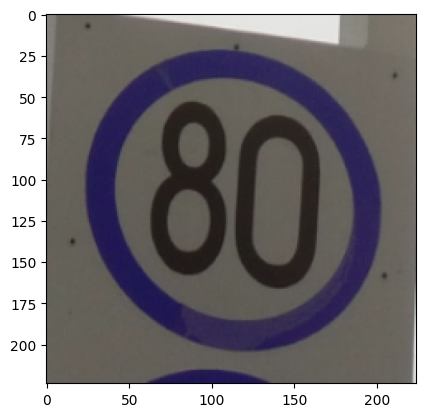

In [8]:
plt.imshow(images[0])

In [9]:
len(images)

4170

In [10]:
images=np.array(images)
labels=np.array(labels)

In [11]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img

In [12]:
X=images
Y=labels
X=np.array(list(map(preprocessing,X))) 
X=X.reshape(X.shape[0],X.shape[1],X.shape[2],1)
Y=np.float32(Y)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
X_train[0]

array([[[0.99607843],
        [1.        ],
        [1.        ],
        ...,
        [0.48627451],
        [0.48627451],
        [0.4745098 ]],

       [[0.99215686],
        [1.        ],
        [1.        ],
        ...,
        [0.44313725],
        [0.45098039],
        [0.4627451 ]],

       [[0.99215686],
        [0.99607843],
        [1.        ],
        ...,
        [0.44313725],
        [0.4627451 ],
        [0.43137255]],

       ...,

       [[0.6745098 ],
        [0.62352941],
        [0.62352941],
        ...,
        [0.20784314],
        [0.16862745],
        [0.15294118]],

       [[0.69019608],
        [0.65882353],
        [0.62352941],
        ...,
        [0.18823529],
        [0.16862745],
        [0.16862745]],

       [[0.70588235],
        [0.65882353],
        [0.65882353],
        ...,
        [0.14117647],
        [0.16862745],
        [0.20784314]]])

In [15]:
def myModel():
    model= Sequential()
    model.add((Conv2D(64,(3,3),input_shape=X_train.shape[1:],activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(64, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add((Conv2D(32, (3,3),activation='relu')))
    model.add((Conv2D(32, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dense(58,activation='softmax')) 
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [16]:
model=myModel()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                   

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=10)

In [18]:
history=model.fit(X_train,Y_train,epochs=100,validation_split=0.3,callbacks=early_stopping)

Epoch 1/100
73/73 [==============================] - 30s 211ms/step - loss: 2.3866 - accuracy: 0.4351 - val_loss: 1.1583 - val_accuracy: 0.7133
Epoch 2/100
73/73 [==============================] - 11s 147ms/step - loss: 0.4599 - accuracy: 0.8792 - val_loss: 0.5508 - val_accuracy: 0.8731
Epoch 3/100
73/73 [==============================] - 11s 149ms/step - loss: 0.0772 - accuracy: 0.9790 - val_loss: 0.5835 - val_accuracy: 0.9121
Epoch 4/100
73/73 [==============================] - 11s 150ms/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.6673 - val_accuracy: 0.8941
Epoch 5/100
73/73 [==============================] - 11s 152ms/step - loss: 0.0104 - accuracy: 0.9979 - val_loss: 0.7873 - val_accuracy: 0.9141
Epoch 6/100
73/73 [==============================] - 11s 155ms/step - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.4888 - val_accuracy: 0.9181
Epoch 7/100
73/73 [==============================] - 11s 158ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.5137 - val_accuracy:

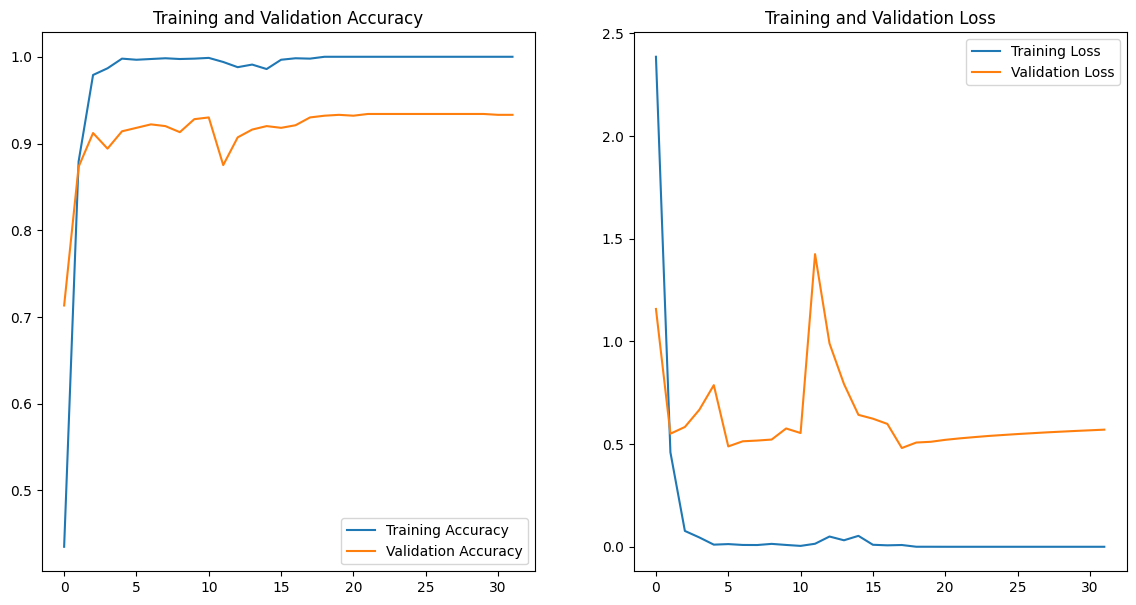

In [20]:
def plot_model_loss_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(32)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_model_loss_curves(history=history)

In [21]:
Y_preds=model.predict(X_test)
Y_preds=np.argmax(Y_preds,axis=1)
Y_preds

27/27 [==============================] - 1s 48ms/step


array([28,  6, 28, 28, 54, 55, 46, 54, 11, 28,  5,  4, 55, 17, 12,  3, 52,
       41, 54,  7, 17, 11, 54,  3,  7, 12, 10,  7, 17, 14, 57, 30, 43, 14,
        7,  5, 12,  3, 28, 14, 28, 14, 17, 55, 49, 11, 14, 35,  3,  4, 16,
       24,  5, 28, 35, 13,  2, 17, 13, 26, 30, 14, 52, 10, 55, 28, 54, 54,
       54, 28, 28, 45,  7,  3, 35, 30,  6, 43, 13, 10, 39,  2, 27, 35, 57,
       26, 35, 35,  3, 28, 20, 14,  7, 54, 30, 15, 54,  3, 43,  7, 30, 16,
       56, 17, 54,  3, 22, 54, 55, 28, 30, 50, 16, 16, 28, 39, 28,  5, 52,
       28, 30,  7, 28, 43, 26, 29, 56, 11,  7,  0, 31, 12, 43,  3, 22,  3,
       43, 24, 55,  6,  7, 29, 16, 26, 28,  6, 28, 43, 28,  5, 16,  7, 17,
       10, 55, 16, 14, 29, 55,  3, 30, 31, 14, 56, 16, 28, 31, 26, 17, 40,
        2, 10,  1,  7,  1,  3, 12, 16,  3,  6, 24, 37, 31, 29, 30, 28, 37,
        5,  3, 54, 26, 28, 24, 30,  0,  5, 23, 16, 43, 26, 37, 44,  4,  4,
       37, 28, 36, 17, 28, 12,  3, 31, 36, 35, 16, 11, 26, 16, 35, 17, 35,
       55,  7, 54,  3, 14

In [22]:
model.evaluate(X_test,Y_test)

27/27 [==============================] - 1s 37ms/step - loss: 0.7038 - accuracy: 0.9029


[0.7038288116455078, 0.902877688407898]